In [1]:
import sys
sys.executable

'/Library/Frameworks/Python.framework/Versions/3.6/bin/python3'

[Optional]: If you're using a Mac/Linux, you can check your environment with these commands:

```
!which pip3
!which python3
!ls -lah /usr/local/bin/python3
```

In [2]:
!pip3 install -U pip
!pip3 install torch==1.3.0
!pip3 install seaborn

Requirement already up-to-date: pip in /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages (19.3.1)
  Using cached https://files.pythonhosted.org/packages/8d/87/4e42d7ab7cb1e5ee9f2f81d9c5955a7c558894f11c90898fdf838ea40327/torch-1.3.0-cp36-none-macosx_10_7_x86_64.whl
ERROR: allennlp 0.9.0 requires pytorch-transformers==1.1.0, which is not installed.
ERROR: apes 1.0.0 requires transformers==2.3.0, which is not installed.
ERROR: opennmt-py 1.0.0 has requirement tqdm~=4.30.0, but you'll have tqdm 4.41.1 which is incompatible.
ERROR: onmt 1.0.0 has requirement torch==1.3.1, but you'll have torch 1.3.0 which is incompatible.
ERROR: onmt 1.0.0 has requirement tqdm==4.38.0, but you'll have tqdm 4.41.1 which is incompatible.
ERROR: apes 1.0.0 has requirement sacremoses==0.0.35, but you'll have sacremoses 0.0.38 which is incompatible.
  Found existing installation: torch 1.3.1
    Uninstalling torch-1.3.1:
      Successfully uninstalled torch-1.3.1


In [3]:
import torch
torch.cuda.is_available()

False

In [4]:
# IPython candies...
from IPython.display import Image
from IPython.core.display import HTML

from IPython.display import clear_output

In [5]:
%%html
<style> table {float:left} </style>

Perceptron
=====

**Perceptron** algorithm is a:

> "*system that depends on **probabilistic** rather than deterministic principles for its operation, gains its reliability from the **properties of statistical measurements obtain from a large population of elements***"
> \- Frank Rosenblatt (1957)

Then the news:

> "*[Perceptron is an] **embryo of an electronic computer** that [the Navy] expects will be **able to walk, talk, see, write, reproduce itself and be conscious of its existence.***"
> \- The New York Times (1958)

News quote cite from Olazaran (1996) 

Perceptron in Bullets
----

 - Perceptron learns to classify any linearly separable set of inputs. 
 - Some nice graphics for perceptron with Go https://appliedgo.net/perceptron/  

If you've got some spare time: 

 - There's a whole book just on perceptron: https://mitpress.mit.edu/books/perceptrons
 - For watercooler gossips on perceptron in the early days, read [Olazaran (1996)](https://pdfs.semanticscholar.org/f3b6/e5ef511b471ff508959f660c94036b434277.pdf?_ga=2.57343906.929185581.1517539221-1505787125.1517539221)
 
 
Perceptron in Math
----

Given a set of inputs $x$, the perceptron 

 - learns $w$ vector to map the inputs to a real-value output between $[0,1]$
 - through the summation of the dot product of the $w·x$ with a transformation function
 
 
Perceptron in Picture
----


In [6]:
##Image(url="perceptron.png", width=500)
Image(url="https://ibin.co/4TyMU8AdpV4J.png", width=500)

(**Note:** Usually, we use $x_1$ as the bias and fix the input to 1)

Perceptron as a Workflow Diagram
----

If you're familiar with [mermaid flowchart](https://mermaidjs.github.io)

```
.. mermaid::

    graph LR
       subgraph Input
          x_1
          x_i 
          x_n
       end
       subgraph Perceptron
            n1((s)) --> n2(("f(s)"))
        end
        x_1 --> |w_1| n1
        x_i --> |w_i| n1
        x_n --> |w_n| n1
        n2 --> y["[0,1]"]

```

In [7]:
##Image(url="perceptron-mermaid.svg", width=500)
Image(url="https://svgshare.com/i/AbJ.svg", width=500)

Optimization Process
====

To learn the weights, $w$, we use an **optimizer** to find the best-fit (optimal) values for $w$ such that the inputs correct maps to the outputs.

Typically, process performs the following 4 steps iteratively.

### **Initialization**

 - **Step 1**: Initialize weights vector
 
### **Forward Propagation**

 
 - **Step 2a**: Multiply the weights vector with the inputs, sum the products, i.e. `s`
 - **Step 2b**: Put the sum through the sigmoid, i.e. `f()`
 
### **Back Propagation**
 
 
 - **Step 3a**: Compute the errors, i.e. difference between expected output and predictions
 - **Step 3b**: Multiply the error with the **derivatives** to get the delta
 - **Step 3c**: Multiply the delta vector with the inputs, sum the product
 
### **Optimizer takes a step**

 - **Step 4**: Multiply the learning rate with the output of Step 3c.
 




In [8]:
import math
import numpy as np
np.random.seed(0)

In [9]:
def sigmoid(x): # Returns values that sums to one.
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sx): 
    # See https://math.stackexchange.com/a/1225116
    # Hint: let sx = sigmoid(x)
    return sx * (1 - sx)

In [10]:
sigmoid(np.array([2.5, 0.32, -1.42]))             # [out]: array([0.92414182, 0.57932425, 0.19466158])

array([0.92414182, 0.57932425, 0.19466158])

In [11]:
sigmoid_derivative(np.array([2.5, 0.32, -1.42]))  # [out]: array([0.07010372, 0.24370766, 0.15676845])

array([-3.75  ,  0.2176, -3.4364])

In [12]:
def cost(predicted, truth):
    return np.abs(truth - predicted)

In [13]:
gold = np.array([0.5, 1.2, 9.8])
pred = np.array([0.6, 1.0, 10.0])
cost(pred, gold)

array([0.1, 0.2, 0.2])

In [14]:
gold = np.array([0.5, 1.2, 9.8])
pred = np.array([9.3, 4.0, 99.0])
cost(pred, gold)

array([ 8.8,  2.8, 89.2])

Representing OR Boolean
---

Lets consider the problem of the OR boolean and apply the perceptron with simple gradient descent. 

| x2 | x3 | y | 
|:--:|:--:|:--:|
| 0 | 0 | 0 |
| 0 | 1 | 1 | 
| 1 | 0 | 1 | 
| 1 | 1 | 1 | 


In [15]:
X = or_input = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = or_output = np.array([[0,1,1,1]]).T

In [16]:
or_input

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [17]:
or_output

array([[0],
       [1],
       [1],
       [1]])

In [18]:
# Define the shape of the weight vector.
num_data, input_dim = or_input.shape
# Define the shape of the output vector. 
output_dim = len(or_output.T)

In [19]:
print('Inputs\n======')
print('no. of rows =', num_data) 
print('no. of cols =', input_dim)
print('\n')
print('Outputs\n=======')
print('no. of cols =', output_dim)

Inputs
no. of rows = 4
no. of cols = 2


Outputs
no. of cols = 1


In [20]:
# Initialize weights between the input layers and the perceptron
W = np.random.random((input_dim, output_dim))
W

array([[0.5488135 ],
       [0.71518937]])

Step 2a: Multiply the weights vector with the inputs, sum the products
====

To get the output of step 2a, 

 - Itrate through each row of the data, `X`
 - For each column in each row, find the product of the value and the respective weights
 - For each row, compute the sum of the products

In [21]:
# If we write it imperatively:
summation = []
for row in X:
    sum_wx = 0
    for feature, weight in zip(row, W):
        sum_wx += feature * weight
    summation.append(sum_wx)
print(np.array(summation))

[[0.        ]
 [0.71518937]
 [0.5488135 ]
 [1.26400287]]


In [22]:
# If we vectorize the process and use numpy.
np.dot(X, W)

array([[0.        ],
       [0.71518937],
       [0.5488135 ],
       [1.26400287]])

Train the Single-Layer Model
====



In [23]:
num_epochs = 10000 # No. of times to iterate.
learning_rate = 0.03 # How large a step to take per iteration.

# Lets standardize and call our inputs X and outputs Y
X = or_input
Y = or_output

for _ in range(num_epochs):
    layer0 = X

    # Step 2a: Multiply the weights vector with the inputs, sum the products, i.e. s
    # Step 2b: Put the sum through the sigmoid, i.e. f()
    # Inside the perceptron, Step 2. 
    layer1 = sigmoid(np.dot(X, W))

    # Back propagation.
    # Step 3a: Compute the errors, i.e. difference between expected output and predictions
    # How much did we miss?
    layer1_error = cost(layer1, Y)

    # Step 3b: Multiply the error with the derivatives to get the delta
    # multiply how much we missed by the slope of the sigmoid at the values in layer1
    layer1_delta = layer1_error * sigmoid_derivative(layer1)

    # Step 3c: Multiply the delta vector with the inputs, sum the product (use np.dot)
    # Step 4: Multiply the learning rate with the output of Step 3c.
    W +=  learning_rate * np.dot(layer0.T, layer1_delta)

In [24]:
layer1

array([[0.5       ],
       [0.95643415],
       [0.95623017],
       [0.99791935]])

In [25]:
# Expected output.
Y

array([[0],
       [1],
       [1],
       [1]])

In [26]:
# On the training data
[[int(prediction > 0.5)] for prediction in layer1]

[[0], [1], [1], [1]]

Lets try the XOR Boolean
---

Lets consider the problem of the OR boolean and apply the perceptron with simple gradient descent. 

| x2 | x3 | y | 
|:--:|:--:|:--:|
| 0 | 0 | 0 |
| 0 | 1 | 1 | 
| 1 | 0 | 1 | 
| 1 | 1 | 0 | 


In [27]:
X = xor_input = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = xor_output = np.array([[0,1,1,0]]).T

In [28]:
xor_input

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [29]:
xor_output

array([[0],
       [1],
       [1],
       [0]])

In [30]:
num_epochs = 10000 # No. of times to iterate.
learning_rate = 0.003 # How large a step to take per iteration.

# Lets drop the last row of data and use that as unseen test.
X = xor_input
Y = xor_output

# Define the shape of the weight vector.
num_data, input_dim = X.shape
# Define the shape of the output vector. 
output_dim = len(Y.T)
# Initialize weights between the input layers and the perceptron
W = np.random.random((input_dim, output_dim))

for _ in range(num_epochs):
    layer0 = X
    # Forward propagation.
    # Inside the perceptron, Step 2. 
    layer1 = sigmoid(np.dot(X, W))

    # How much did we miss?
    layer1_error = cost(layer1, Y)

    # Back propagation.
    # multiply how much we missed by the slope of the sigmoid at the values in layer1
    layer1_delta = sigmoid_derivative(layer1) * layer1_error

    # update weights
    W +=  learning_rate * np.dot(layer0.T, layer1_delta)

In [31]:
# Expected output.
Y

array([[0],
       [1],
       [1],
       [0]])

In [32]:
# On the training data
[int(prediction > 0.5) for prediction in layer1] # All correct.

[0, 1, 1, 1]

You can't represent XOR with simple perceptron !!!
====

No matter how you change the hyperparameters or data, the XOR function can't be represented by a single perceptron layer.
 
There's no way you can get all four data points to get the correct outputs for the XOR boolean operation.


Solving XOR (Add more layers)
====

In [33]:
from itertools import chain
import numpy as np
np.random.seed(0)

def sigmoid(x): # Returns values that sums to one.
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sx):
    # See https://math.stackexchange.com/a/1225116
    return sx * (1 - sx)

# Cost functions.
def cost(predicted, truth):
    return truth - predicted

xor_input = np.array([[0,0], [0,1], [1,0], [1,1]])
xor_output = np.array([[0,1,1,0]]).T

# Define the shape of the weight vector.
num_data, input_dim = X.shape
# Lets set the dimensions for the intermediate layer.
hidden_dim = 5
# Initialize weights between the input layers and the hidden layer.
W1 = np.random.random((input_dim, hidden_dim))

# Define the shape of the output vector. 
output_dim = len(Y.T)
# Initialize weights between the hidden layers and the output layer.
W2 = np.random.random((hidden_dim, output_dim))

# Initialize weigh
num_epochs = 10000
learning_rate = 0.03

for epoch_n in range(num_epochs):
    layer0 = X
    # Forward propagation.
    
    # Inside the perceptron, Step 2. 
    layer1 = sigmoid(np.dot(layer0, W1))
    layer2 = sigmoid(np.dot(layer1, W2))

    # Back propagation (Y -> layer2)
    
    # How much did we miss in the predictions?
    layer2_error = cost(layer2, Y)
    # In what direction is the target value?
    # Were we really close? If so, don't change too much.
    layer2_delta = layer2_error * sigmoid_derivative(layer2)

    
    # Back propagation (layer2 -> layer1)
    # How much did each layer1 value contribute to the layer2 error (according to the weights)?
    layer1_error = np.dot(layer2_delta, W2.T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)
    
    # update weights
    W2 +=  learning_rate * np.dot(layer1.T, layer2_delta)
    W1 +=  learning_rate * np.dot(layer0.T, layer1_delta)
    ##print(epoch_n, list((layer2)))

In [34]:
# Training input.
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [35]:
# Expected output.
Y

array([[0],
       [1],
       [1],
       [0]])

In [36]:
layer2 # Our output layer

array([[0.31284349],
       [0.6213127 ],
       [0.62323891],
       [0.46427804]])

In [37]:
# On the training data
[int(prediction > 0.5) for prediction in layer2] 

[0, 1, 1, 0]

Now try adding another layer
====

Use the same process:
    
  1. Initialize
  2. Forward Propagate
  3. Back Propagate 
  4. Update (aka step)
  


In [38]:
from itertools import chain
import numpy as np
np.random.seed(0)

def sigmoid(x): # Returns values that sums to one.
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sx):
    # See https://math.stackexchange.com/a/1225116
    return sx * (1 - sx)

# Cost functions.
def cost(predicted, truth):
    return truth - predicted

xor_input = np.array([[0,0], [0,1], [1,0], [1,1]])
xor_output = np.array([[0,1,1,0]]).T



In [39]:
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [40]:
Y

array([[0],
       [1],
       [1],
       [0]])

In [41]:
# Define the shape of the weight vector.
num_data, input_dim = X.shape
# Lets set the dimensions for the intermediate layer.
layer0to1_hidden_dim = 5
layer1to2_hidden_dim = 5

# Initialize weights between the input layers 0 ->  layer 1
W1 = np.random.random((input_dim, layer0to1_hidden_dim))

# Initialize weights between the layer 1 -> layer 2
W2 = np.random.random((layer0to1_hidden_dim, layer1to2_hidden_dim))

# Define the shape of the output vector. 
output_dim = len(Y.T)
# Initialize weights between the layer 2 -> layer 3
W3 = np.random.random((layer1to2_hidden_dim, output_dim))

# Initialize weigh
num_epochs = 10000
learning_rate = 1.0

for epoch_n in range(num_epochs):
    layer0 = X
    # Forward propagation.
    
    # Inside the perceptron, Step 2. 
    layer1 = sigmoid(np.dot(layer0, W1))
    layer2 = sigmoid(np.dot(layer1, W2))
    layer3 = sigmoid(np.dot(layer2, W3))

    # Back propagation (Y -> layer2)
    # How much did we miss in the predictions?
    layer3_error = cost(layer3, Y)
    # In what direction is the target value?
    # Were we really close? If so, don't change too much.
    layer3_delta = layer3_error * sigmoid_derivative(layer3)

    # Back propagation (layer2 -> layer1)
    # How much did each layer1 value contribute to the layer3 error (according to the weights)?
    layer2_error = np.dot(layer3_delta, W3.T)
    layer2_delta = layer3_error * sigmoid_derivative(layer2)
    
    # Back propagation (layer2 -> layer1)
    # How much did each layer1 value contribute to the layer2 error (according to the weights)?
    layer1_error = np.dot(layer2_delta, W2.T)
    layer1_delta = layer1_error * sigmoid_derivative(layer1)
    
    # update weights
    W3 +=  learning_rate * np.dot(layer2.T, layer3_delta)
    W2 +=  learning_rate * np.dot(layer1.T, layer2_delta)
    W1 +=  learning_rate * np.dot(layer0.T, layer1_delta)

In [42]:
Y

array([[0],
       [1],
       [1],
       [0]])

In [43]:
layer3

array([[0.50039537],
       [0.50000003],
       [0.9929507 ],
       [0.50001378]])

In [44]:
# On the training data
[int(prediction > 0.5) for prediction in layer3] 

[1, 1, 1, 1]

# Now, lets do it with PyTorch 

First lets try a single perceptron and see that we can't train a model that can represent XOR. 




In [45]:
from tqdm import tqdm

import torch
from torch import nn
from torch.autograd import Variable
from torch import FloatTensor
from torch import optim
use_cuda = torch.cuda.is_available()

In [46]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")
sns.set(rc={'figure.figsize':(15, 10)})

In [47]:
X # Original XOR X input in numpy array data structure.

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [48]:
Y # Original XOR Y output in numpy array data structure.

array([[0],
       [1],
       [1],
       [0]])

In [49]:
device = 'gpu' if torch.cuda.is_available()  else 'cpu'
# Converting the X to PyTorch-able data structure.
X_pt = torch.tensor(X).float()
X_pt = X_pt.to(device)
# Converting the Y to PyTorch-able data structure.
Y_pt = torch.tensor(Y, requires_grad=False).float()
Y_pt = Y_pt.to(device)
print(X_pt)
print(Y_pt)

tensor([[0., 0.],
        [0., 1.],
        [1., 0.],
        [1., 1.]])
tensor([[0.],
        [1.],
        [1.],
        [0.]])


In [50]:
# Use tensor.shape to get the shape of the matrix/tensor.
num_data, input_dim = X_pt.shape
print('Inputs Dim:', input_dim)

num_data, output_dim = Y_pt.shape
print('Output Dim:', output_dim)

Inputs Dim: 2
Output Dim: 1


In [51]:
# Use Sequential to define a simple feed-forward network.
model = nn.Sequential(
            nn.Linear(input_dim, output_dim), # Use nn.Linear to get our simple perceptron
            nn.Sigmoid()                      # Use nn.Sigmoid to get our sigmoid non-linearity
        )
model

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
  (1): Sigmoid()
)

In [52]:
# Remember we define as: cost = truth - predicted
# If we take the absolute of cost, i.e.: cost = |truth - predicted|
# we get the L1 loss function. 
criterion = nn.L1Loss() 
learning_rate = 0.03

In [53]:
# The simple weights/parameters update processes we did before
# is call the gradient descent. SGD is the sochastic variant of
# gradient descent. 
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

(**Note**: Personally, I strongely encourage you to go through the [University of Washington course of machine learning regression](https://www.coursera.org/learn/ml-regression) to better understand the fundamentals of (i) ***gradient***, (ii) ***loss*** and (iii) ***optimizer***. But given that you know how to code it, the process of more complex variants of gradient/loss computation and optimizer's step is easy to grasp)

# Training a PyTorch model

To train a model using PyTorch, we simply iterate through the no. of epochs and imperatively state the computations we want to perform. 

## Remember the steps?

 1. Initialize 
 2. Forward Propagation
 3. Backward Propagation
 4. Update Optimizer

In [54]:
num_epochs = 1000

100%|██████████| 10000/10000 [00:05<00:00, 1932.42it/s]


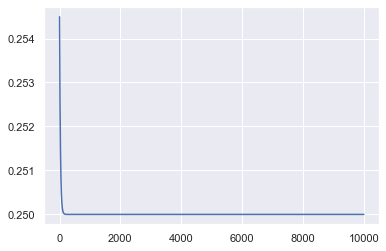

In [55]:
# Step 1: Initialization. 
# Note: When using PyTorch a lot of the manual weights
#       initialization is done automatically when we define
#       the model (aka architecture)
model = nn.Sequential(
            nn.Linear(input_dim, output_dim), 
            nn.Sigmoid())
criterion = nn.MSELoss() 
learning_rate = 1.0
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
num_epochs = 10000

losses = []

for i in tqdm(range(num_epochs)):
    # Reset the gradient after every epoch. 
    optimizer.zero_grad() 
    # Step 2: Foward Propagation
    predictions = model(X_pt)
    
    # Step 3: Back Propagation 
    # Calculate the cost between the predictions and the truth.
    loss_this_epoch = criterion(predictions, Y_pt)
    # Note: The neat thing about PyTorch is it does the 
    #       auto-gradient computation, no more manually defining
    #       derivative of functions and manually propagating
    #       the errors layer by layer.
    loss_this_epoch.backward()
    
    # Step 4: Optimizer take a step. 
    # Note: Previously, we have to manually update the 
    #       weights of each layer individually according to the
    #       learning rate and the layer delta. 
    #       PyTorch does that automatically =)
    optimizer.step()
    
    # Log the loss value as we proceed through the epochs.
    losses.append(loss_this_epoch.data.item())
    
# Visualize the losses
plt.plot(losses)
plt.show()


In [56]:
for _x, _y in zip(X_pt, Y_pt):
    prediction = model(_x)
    print('Input:\t', list(map(int, _x)))
    print('Pred:\t', int(prediction))
    print('Ouput:\t', int(_y))
    print('######')

Input:	 [0, 0]
Pred:	 0
Ouput:	 0
######
Input:	 [0, 1]
Pred:	 0
Ouput:	 1
######
Input:	 [1, 0]
Pred:	 0
Ouput:	 1
######
Input:	 [1, 1]
Pred:	 0
Ouput:	 0
######


Now, try again with 2 layers using PyTorch
====

100%|██████████| 5000/5000 [00:02<00:00, 1836.28it/s]


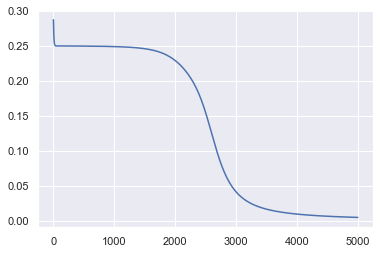

CPU times: user 2.95 s, sys: 133 ms, total: 3.09 s
Wall time: 3.42 s


In [57]:
%%time

hidden_dim = 5
num_data, input_dim = X_pt.shape
num_data, output_dim = Y_pt.shape

model = nn.Sequential(nn.Linear(input_dim, hidden_dim),
                      nn.Sigmoid(), 
                      nn.Linear(hidden_dim, output_dim),
                      nn.Sigmoid())

criterion = nn.MSELoss()
learning_rate = 0.3
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
num_epochs = 5000

losses = []

for _ in tqdm(range(num_epochs)):
    optimizer.zero_grad()
    predictions = model(X_pt)
    loss_this_epoch = criterion(predictions, Y_pt)
    loss_this_epoch.backward()
    optimizer.step()
    losses.append(loss_this_epoch.data.item())
    ##print([float(_pred) for _pred in predictions], list(map(int, Y_pt)), loss_this_epoch.data[0])
    
# Visualize the losses
plt.plot(losses)
plt.show()

In [58]:
for _x, _y in zip(X_pt, Y_pt):
    prediction = model(_x)
    print('Input:\t', list(map(int, _x)))
    print('Pred:\t', int(prediction > 0.5))
    print('Ouput:\t', int(_y))
    print('######')

Input:	 [0, 0]
Pred:	 0
Ouput:	 0
######
Input:	 [0, 1]
Pred:	 1
Ouput:	 1
######
Input:	 [1, 0]
Pred:	 1
Ouput:	 1
######
Input:	 [1, 1]
Pred:	 0
Ouput:	 0
######


MNIST: The "Hello World" of Neural Nets
====

Like any deep learning class, we ***must*** do the MNIST. 

The MNIST dataset is 

 - is made up of handwritten digits 
 - 60,000 examples training set
 - 10,000 examples test set

In [59]:
# We're going to install tensorflow here because their dataset access is simpler =)
!pip3 install torchvision

In [60]:
from torchvision import datasets, transforms

In [61]:
mnist_train = datasets.MNIST('../data', train=True, download=True, 
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))
                             ]))

mnist_test = datasets.MNIST('../data', train=False, download=True, 
                             transform=transforms.Compose([
                                 transforms.ToTensor(),
                                 transforms.Normalize((0.1307,), (0.3081,))
                             ]))

In [62]:
# Visualization Candies
import matplotlib.pyplot as plt

def show_image(mnist_x_vector, mnist_y_vector):
    pixels = mnist_x_vector.reshape((28, 28))
    label = np.where(mnist_y_vector == 1)[0]
    plt.title('Label is {}'.format(label))
    plt.imshow(pixels, cmap='gray')
    plt.show()

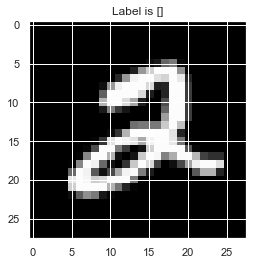

In [63]:
# Fifth image and label.
show_image(mnist_train.data[5], mnist_train.targets[5])

# Lets apply what we learn about multi-layered perceptron with PyTorch and apply it to the MNIST data. 

In [64]:
X_mnist = mnist_train.data.float()
Y_mnist = mnist_train.targets.float()

X_mnist_test = mnist_test.data.float()
Y_mnist_test = mnist_test.targets.float()

In [65]:
Y_mnist.shape

torch.Size([60000])

In [66]:
# Use FloatTensor.shape to get the shape of the matrix/tensor.
num_data, *input_dim = X_mnist.shape
print('No. of images:', num_data)
print('Inputs Dim:', input_dim)

num_data, *output_dim = Y_mnist.shape
num_test_data, *output_dim = Y_mnist_test.shape
print('Output Dim:', output_dim)


No. of images: 60000
Inputs Dim: [28, 28]
Output Dim: []


In [67]:
# Flatten the dimensions of the images.
X_mnist = mnist_train.data.float().view(num_data, -1)
Y_mnist = mnist_train.targets.float().unsqueeze(1)

X_mnist_test = mnist_test.data.float().view(num_test_data, -1)
Y_mnist_test = mnist_test.targets.float().unsqueeze(1)

In [68]:
# Use FloatTensor.shape to get the shape of the matrix/tensor.
num_data, *input_dim = X_mnist.shape
print('No. of images:', num_data)
print('Inputs Dim:', input_dim)

num_data, *output_dim = Y_mnist.shape
num_test_data, *output_dim = Y_mnist_test.shape
print('Output Dim:', output_dim)

No. of images: 60000
Inputs Dim: [784]
Output Dim: [1]


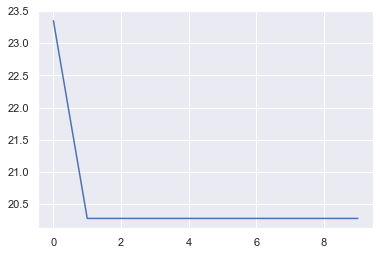

100%|██████████| 10/10 [00:04<00:00,  2.09it/s]


In [69]:
hidden_dim = 500

model = nn.Sequential(nn.Linear(784, 1),
                      nn.Sigmoid())

criterion = nn.MSELoss()
learning_rate = 1.0
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
num_epochs = 10


losses = []
plt.ion()

for _e in tqdm(range(num_epochs)):
    optimizer.zero_grad()
    predictions = model(X_mnist)
    loss_this_epoch = criterion(predictions, Y_mnist)
    loss_this_epoch.backward()
    optimizer.step()
    ##print([float(_pred) for _pred in predictions], list(map(int, Y_pt)), loss_this_epoch.data[0])
    losses.append(loss_this_epoch.data.item())

    clear_output(wait=True)
    plt.plot(losses)
    plt.pause(0.05)
    

In [70]:
predictions = model(X_mnist_test)
predictions

tensor([[1.],
        [1.],
        [1.],
        ...,
        [1.],
        [1.],
        [1.]], grad_fn=<SigmoidBackward>)

In [71]:
pred = np.array([np.argmax(_p) for _p in predictions.data.numpy()])
pred

array([0, 0, 0, ..., 0, 0, 0])

In [72]:
truth = np.array([np.argmax(_p) for _p in Y_mnist_test.data.numpy()])
truth

array([0, 0, 0, ..., 0, 0, 0])

In [73]:
(pred == truth).sum() / len(pred)

1.0